## Estimate melt fraction F, from trace element concenrations in n samples (assume F and C0 is the same for all samples).

No. of traces:  2
Nb : P:  0.012029999999999999  D:  0.0038059999999999995
Dy : P:  0.32560000000000006  D:  0.0928
1.676009825650986 0.8748609595887331 0.9206852400608625

Summary of estimated parameters
---------------------------------
P:  1.676009825650986
D:  0.8748609595887331
F:  0.9206852400608625

C1:  [0.77 0.86 1.16 1.74 0.45 2.7  2.72 2.75 3.16 2.19]  Predicted C1:  [[0.81112391 0.81112391 0.81112391 0.81112391 0.81112391]
 [2.75836749 2.75836749 2.75836749 2.75836749 2.75836749]]


<ipython-input-36-063f662d608a>:47: RuntimeWarning: divide by zero encountered in true_divide
  return (C0/(F*((1-P)+D)))


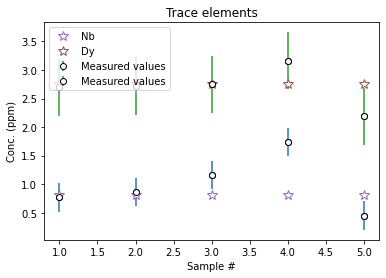

In [36]:
# -*- coding: utf-8 -*-

# Import required modules
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Data for test...read all this in from Excel or csv file in future

#Distribution coefficients
Kd = {'ol':{'Nb':1.,'Dy':1,'Zr':1,'Yb':1},
     {'opx':{'Nb':1.,'Dy':1,'Zr':1,'Yb':1},
     {'cpx':{'Nb':1.,'Dy':1,'Zr':1,'Yb':1},
     {'sp':{'Nb':1.,'Dy':1,'Zr':1,'Yb':1}}    
      }
# Initial concentrations in source
C0 = 

# Mineral proportions in mantle source and melt modes
mntl_modes = {'ol':0.58,'opx':0.27,'cpx':0.12,'sp':0.03}
melt_modes = {'ol':0.2,'opx':0.25,'cpx':0.45,'sp':0.1}

# Set C0 values for mantle source
C0_Nb = np.full((5),0.1485) #normal MOR Nb
C0_Dy = np.full((5),0.505) #normal MOR Dy

# Measured concentration of trace element, Nb
C1_Nb = np.array([0.77,0.86,1.16,1.74,0.45])
C1_Dy = np.array([2.70,2.72,2.75,3.16,2.19])

sc1_Nb = np.full((5),0.25)  #Add estimated uncertainties to measured values
sc1_Dy = np.full((5),0.5)  #Add estimated uncertainties to measured values

Kd_Nb = np.array([0.00005,0.0015,0.0081,0.08]) #Distribution coefficients for Nb
Kd_Dy = np.array([0.0055,0.015,0.711,0.008]) #Distribution coefficients for Dy

# Combine single trace values into joint arrays, and flatten to 1-D for curve_fit
C0 = np.ndarray.flatten(np.array([C0_Nb,C0_Dy]))
C1 = np.ndarray.flatten(np.array([C1_Nb,C1_Dy]))
sc1 = np.ndarray.flatten(np.array([sc1_Nb,sc1_Dy]))

Kd = np.array([Kd_Nb,Kd_Dy])

# Set mantle and melt modes
Mntm = np.array([0.58,0.27,0.12,0.03]) #mantle modes for ol,opx,cpx,sp
Mltm = np.array([0.2,0.25,0.45,0.1])   #melt modes for ol,opx,cpx,sp

# Calculate P and D for all trace elements, and store in 1-D P and D arrays
traces = ['Nb','Dy']
P = np.zeros(shape=(len(traces)))
D = np.zeros(shape=(len(traces)))

print ('No. of traces: ',len(traces))
for trace in range(0,len(traces)):
   P[trace] = sum(Kd[trace]*Mltm)
   D[trace] = sum(Kd[trace]*Mntm)
   print (traces[trace],': P: ',P[trace],' D: ',D[trace])

# Define function for use with curve_fit(), result returened must be a 1-D array
def meltfc(C0,P,D,F):
    return (C0/(F*((1-P)+D)))

# Do non-linear curve fit with bounds
#-------------------------------------------------------------------
# Set values for initial guess
F=0.5

#initial_guess = np.array([P,D,F])

# Set min-max bounds on parameter search for P,D,F and C0
param_bounds=([(P-P*0.05),(D-D*0.05),0.001],[(P+P*0.05),(D+D*0.05),1.])

# Run non-linear curve fit [popt is an array containing optimum fitted parameter values, pcov is the covariance matrix]
popt, pcov = curve_fit(meltfc, C0, C1,  method='dogbox')

perr = np.sqrt(np.diag(pcov))

print(*popt)


print ('\nSummary of estimated parameters\n---------------------------------')
print ('P: ',popt[0])
print ('D: ',popt[1])
print ('F: ',popt[2])
print('\nC1: ', C1,' Predicted C1: ', meltfc(C0,*popt).reshape(2,5))


# Draw plot (basically a simple x,y graph, uses matplotlib routines from pyplot)
#--------------------------------------------------------
plt.figure(1)

# Set various axes and labels etc
plt.title('Trace elements')
plt.xlabel('Sample #')
plt.ylabel('Conc. (ppm)')
# Set min, max values for x,y axes


sample_no = np.array([1,2,3,4,5])
C1_model = meltfc(C0,*popt).reshape(2,5)
C1_data = C1.reshape(2,5)
sc1 = sc1.reshape(2,5)


# Plot Observed concentrations
style_data = {'marker':'o','markersize':6, 'markerfacecolor':'w', 'markeredgecolor':'k',
       'elinewidth':1.5,'linewidth':0, 'label':'Measured values'}

for trace in range(len(traces)):
   plt.errorbar(sample_no, C1_data[trace], yerr=sc1[trace], **style_data)
   plt.plot(sample_no, C1_data[trace], 'o',markersize=6, markerfacecolor='w', markeredgecolor='k',)

# Plot model estimates for C1
for trace in range(len(traces)):
   plt.plot(sample_no, C1_model[trace], '*',markersize=10, markerfacecolor='w', label=traces[trace])

#Plot legend
plt.legend(loc='upper left')

# Write plot to pdf file
#plt.savefig('meltfc.pdf', format='pdf')

# Show the plot on screen
plt.show()
